In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [227]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [48]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [41]:
sex_smoker/df.shape[0]

sex     smoker
female  no        0.408819
        yes       0.085949
male    no        0.386398
        yes       0.118834
dtype: float64

([<matplotlib.patches.Wedge at 0x183e040ae80>,
 [Text(0.36731715856493025, 1.2470277082021017, 'Female-non smoker'),
  Text(-1.4317181412474886, 0.44741833223822713, 'Female-smoker'),
  Text(-0.4559642809931387, -1.1099984569621755, 'Male-smoker'),
  Text(1.0242304754367841, -0.4011881518521445, 'Male-non smoker')],
 [Text(0.22604132834764934, 0.7674016665859087, '40.881914%'),
  Text(-0.954478760831659, 0.2982788881588181, '8.594918%'),
  Text(-0.2659791639126642, -0.6474990998946022, '38.639760%'),
  Text(0.5586711684200639, -0.21882990101026065, '11.883408%')])

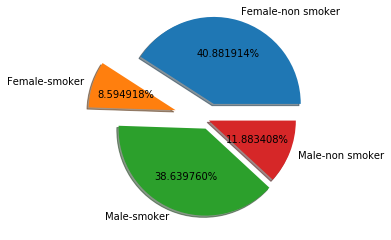

In [50]:
import matplotlib.pyplot as plt
sex_smoker=df.groupby(['sex','smoker']).size()
plt.pie(sex_smoker,labels=['Female-non smoker','Female-smoker','Male-smoker','Male-non smoker'],autopct='%f%%',shadow=True,explode=(0.2,0.4,0.1,0.0))

274 -Smokers
1064 -Non-Smokers


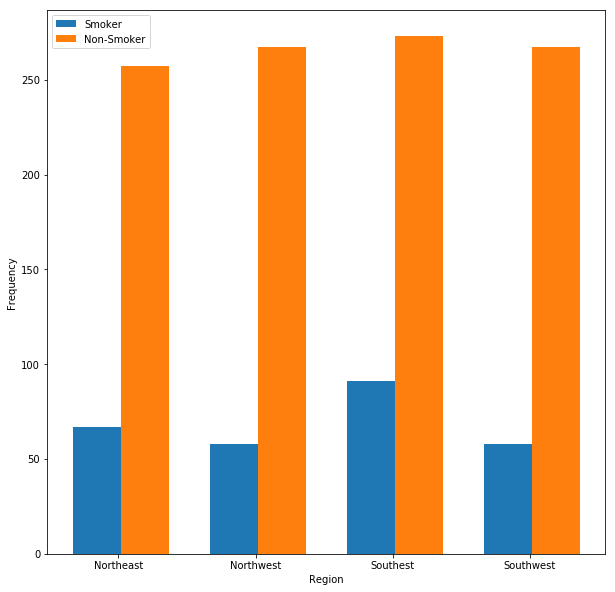

In [209]:
print(df[df.smoker=='yes'].groupby('region').size().sum(),'-Smokers')
print(df[df.smoker=='no'].groupby('region').size().sum(),'-Non-Smokers')
barWidth =0.35
r1 = np.arange(len(df.region.value_counts().index))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
plt.bar(r1,df[df.smoker=='yes'].groupby('region').size(),width=0.35,label='Smoker')
plt.bar(r2,df[df.smoker=='no'].groupby('region').size(),width=0.35,label='Non-Smoker')
# plt.rcParams["figure.figsize"] = (15,15) #(width,height)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks([r+0.16 for r in range(len(df.region.value_counts().index))],['Northeast','Northwest','Southest','Southwest'])
plt.legend()
plt.show()

In [230]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()df.sex=lenc.fit_transform(df.sex) #0-female ,1-male
df.region=lenc.fit_transform(df.region) #0-northeast,1-northwest,2-southeast,3-southwest
df.smoker=lenc.fit_transform(df.smoker) #0-no,1-yes

# lenc.fit(df.smoker) #this encodes the passed series
# lenc.classes_   #this returns a list which has the categorical data which is given a label same as its index in the list

In [231]:
df.head() #encoded dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [237]:
X=df.drop('charges',axis=1)
Y=df.charges

In [243]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [241]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(802, 6)
(802,)
(536, 6)
(536,)


In [244]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [245]:
le.score(x_val,y_val)

0.7605576143282492

In [249]:
y_pred=le.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7595417528833143